In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/truetype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/glyphicons: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 di

In [ ]:
%cd '/content/drive/MyDrive/본 프로젝트/data'

/content/drive/MyDrive/본 프로젝트/data


# 단일 컬럼

In [ ]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('Seoul_contain_big_18to22.csv', encoding = 'euc-kr')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df

,기준_년,기준_분기,자치구,행정동,대분류,중분류,업종명,점포_수,총_점포수,개업률,...,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율
0,2022,4,강남구,삼성1동,소매,유통,전자상거래업,6,6,0,...,18,26,0,0,29,38,34,0,3,97
1,2022,4,강남구,삼성1동,소매,가구/인테리어,가전제품,8,8,0,...,17,14,0,3,22,32,38,5,59,41
2,2022,4,강남구,삼성1동,소매,가구/인테리어,가구,6,6,0,...,19,17,0,9,33,42,16,0,42,59
3,2022,4,강남구,삼성1동,소매,생활용품,화초,5,5,0,...,15,6,0,10,42,24,25,0,58,42
4,2022,4,강남구,삼성1동,소매,생활용품,완구,6,6,0,...,43,13,0,2,11,43,44,0,63,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737171,2018,4,강남구,삼성1동,소매,가구/인테리어,가구,6,6,0,...,11,0,0,25,14,43,17,0,43,57
737172,2018,4,강남구,삼성1동,소매,가구/인테리어,가전제품,8,8,0,...,16,9,2,3,22,32,38,3,58,42
737173,2018,4,강남구,삼성1동,소매,가구/인테리어,인테리어,4,4,0,...,20,18,0,2,19,30,44,5,32,68
737174,2018,4,강남구,삼성1동,소매,가구/인테리어,예술품,9,9,0,...,12,7,0,7,25,33,34,1,38,62


In [ ]:
df['기준년분기'] = df['기준_년'].astype(str) + "-" + df['기준_분기'].astype(str)

In [ ]:
df.dropna(axis=0).reset_index()

,index,기준_년,기준_분기,자치구,행정동,대분류,중분류,업종명,점포_수,총_점포수,...,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,기준년분기
0,0,2022,4,강남구,삼성1동,소매,유통,전자상거래업,6,6,...,26,0,0,29,38,34,0,3,97,2022-4
1,1,2022,4,강남구,삼성1동,소매,가구/인테리어,가전제품,8,8,...,14,0,3,22,32,38,5,59,41,2022-4
2,2,2022,4,강남구,삼성1동,소매,가구/인테리어,가구,6,6,...,17,0,9,33,42,16,0,42,59,2022-4
3,3,2022,4,강남구,삼성1동,소매,생활용품,화초,5,5,...,6,0,10,42,24,25,0,58,42,2022-4
4,4,2022,4,강남구,삼성1동,소매,생활용품,완구,6,6,...,13,0,2,11,43,44,0,63,37,2022-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721933,737171,2018,4,강남구,삼성1동,소매,가구/인테리어,가구,6,6,...,0,0,25,14,43,17,0,43,57,2018-4
721934,737172,2018,4,강남구,삼성1동,소매,가구/인테리어,가전제품,8,8,...,9,2,3,22,32,38,3,58,42,2018-4
721935,737173,2018,4,강남구,삼성1동,소매,가구/인테리어,인테리어,4,4,...,18,0,2,19,30,44,5,32,68,2018-4
721936,737174,2018,4,강남구,삼성1동,소매,가구/인테리어,예술품,9,9,...,7,0,7,25,33,34,1,38,62,2018-4


In [ ]:
df.columns

Index(['기준_년', '기준_분기', '자치구', '행정동', '대분류', '중분류', '업종명', '점포_수', '총_점포수',
       '개업률', '개업_점포_수', '폐업률', '폐업_점포_수', '프랜차이즈_점포_수', '분기당_매출_금액',
       '분기당_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액',
       '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액',
       '00~06시_매출금액', '06~11시_매출금액', '11~14시_매출금액', '14~17시_매출금액',
       '17~21시_매출금액', '21~24시_매출금액', '남성_매출_금액', '여성_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
       '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율',
       '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율', '기준년분기'],
      dtype=

In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [ ]:
TRAIN_SPLIT = 300000
# 재현성을 보장하기 위해 시드 설정.
tf.random.set_seed(13)

In [ ]:
uni_data = df['점포_수']
uni_data.index = df['기준년분기']
uni_data.head()

기준년분기
2022-4    6
2022-4    8
2022-4    6
2022-4    5
2022-4    6
Name: 점포_수, dtype: int64

array([<Axes: xlabel='기준년분기'>], dtype=object)

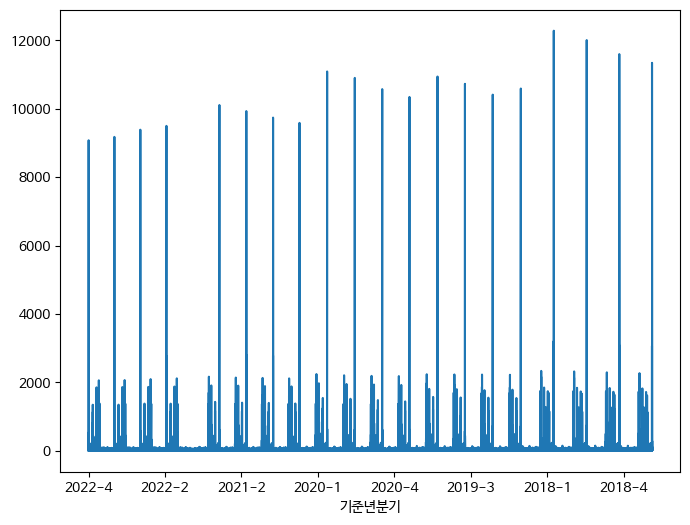

In [ ]:
uni_data.plot(subplots=True)

In [ ]:
uni_data = uni_data.values
print(uni_data)

[6 8 6 ... 4 9 8]


In [ ]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
# 데이터를 표준화합시다.
uni_data = (uni_data-uni_train_mean)/uni_train_std
print(uni_data)

[-0.04903613 -0.01586076 -0.04903613 ... -0.0822115   0.00072693
 -0.01586076]


In [ ]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [ ]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-4.90361267e-02]
 [-1.58607571e-02]
 [-4.90361267e-02]
 [-6.56238115e-02]
 [-4.90361267e-02]
 [ 5.04899820e-02]
 [ 6.47646634e-01]
 [ 7.26927639e-04]
 [ 7.26927639e-04]
 [ 2.49542199e-01]
 [-1.58607571e-02]
 [ 2.32954515e-01]
 [ 5.64708210e-01]
 [ 3.94859590e+00]
 [ 6.70776668e-02]
 [-1.58607571e-02]
 [ 1.99779145e-01]
 [-1.15386866e-01]
 [ 8.36653515e-02]
 [-1.15386866e-01]]

 Target temperature to predict
-0.11538686580960057


In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


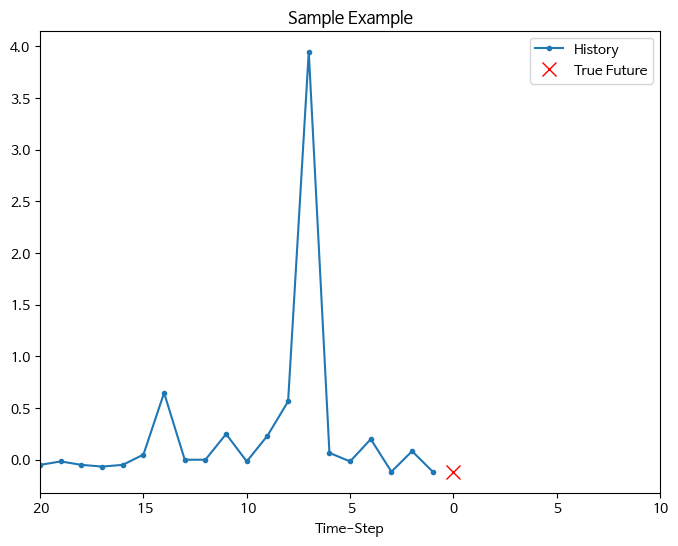

In [ ]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [ ]:
def baseline(history):
  return np.mean(history)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

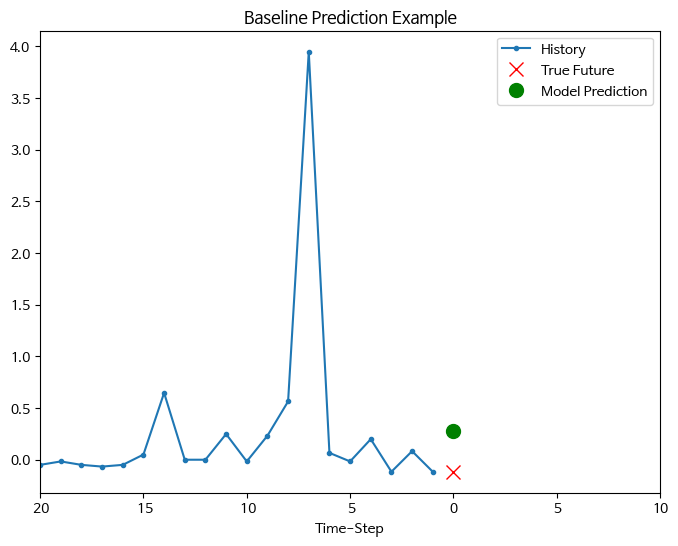

In [ ]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [ ]:
simple_lstm_model = tf.keras.models.Sequential([
      # x_train_uni.shape = (299980, 20, 1)
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [ ]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

8/8 [==============================] - 1s 4ms/step
(256, 1)


In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 7s 22ms/step - loss: 0.1396 - val_loss: 0.1829
Epoch 2/10
200/200 [==============================] - 3s 16ms/step - loss: 0.1171 - val_loss: 0.1821
Epoch 3/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0926 - val_loss: 0.1820
Epoch 4/10
200/200 [==============================] - 3s 14ms/step - loss: 0.1185 - val_loss: 0.1799
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 0.1059 - val_loss: 0.1798
Epoch 6/10
200/200 [==============================] - 4s 21ms/step - loss: 0.1264 - val_loss: 0.1804
Epoch 7/10
200/200 [==============================] - 3s 14ms/step - loss: 0.1144 - val_loss: 0.1815
Epoch 8/10
200/200 [==============================] - 3s 13ms/step - loss: 0.1247 - val_loss: 0.1814
Epoch 9/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0912 - val_loss: 0.1801
Epoch 10/10
200/200 [==============================] - 3s 13ms/step - loss: 0.1098 - val_lo

8/8 [==============================] - 0s 4ms/step


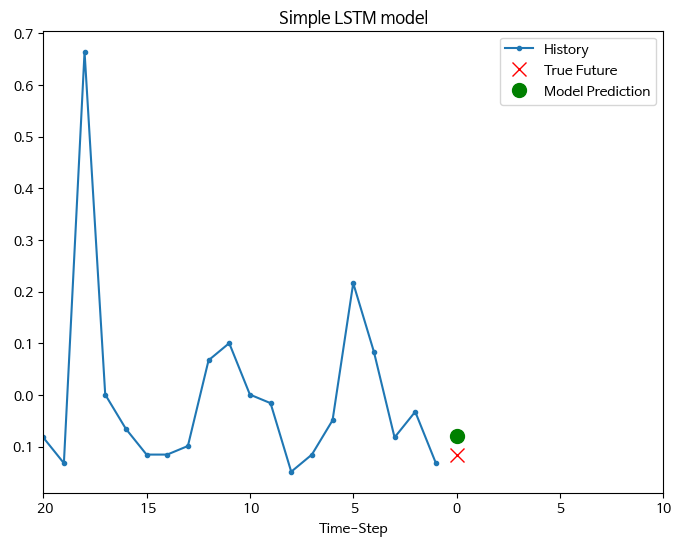

8/8 [==============================] - 0s 3ms/step


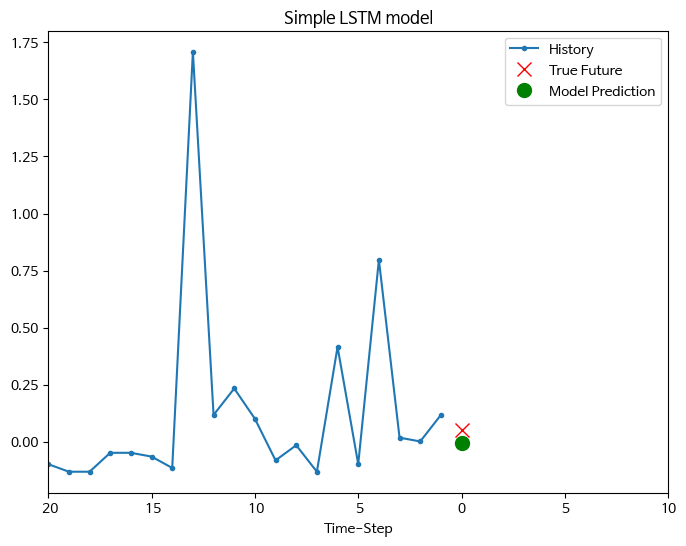

8/8 [==============================] - 0s 3ms/step


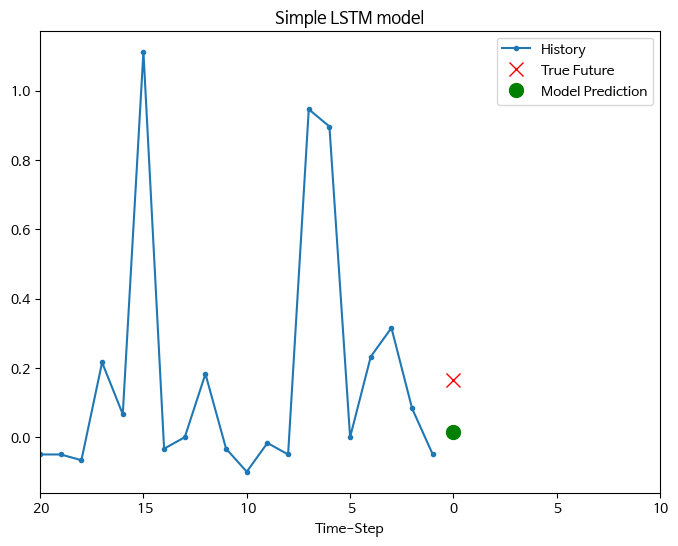

In [ ]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

# 다중 컬럼

In [ ]:
df.columns

Index(['기준_년', '기준_분기', '자치구', '행정동', '대분류', '중분류', '업종명', '점포_수', '총_점포수',
       '개업률', '개업_점포_수', '폐업률', '폐업_점포_수', '프랜차이즈_점포_수', '분기당_매출_금액',
       '분기당_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액',
       '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액',
       '00~06시_매출금액', '06~11시_매출금액', '11~14시_매출금액', '14~17시_매출금액',
       '17~21시_매출금액', '21~24시_매출금액', '남성_매출_금액', '여성_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
       '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율',
       '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율', '기준년분기'],
      dtype=

In [ ]:
features_considered = ['개업률', '폐업률', '점포_수']

In [ ]:
features = df[features_considered]
features.index = df['기준년분기']
features.head()

,개업률,폐업률,점포_수
기준년분기,,,
2022-4,0,0,6
2022-4,0,0,8
2022-4,0,0,6
2022-4,0,0,5
2022-4,0,0,6


array([<Axes: xlabel='기준년분기'>, <Axes: xlabel='기준년분기'>,
       <Axes: xlabel='기준년분기'>], dtype=object)

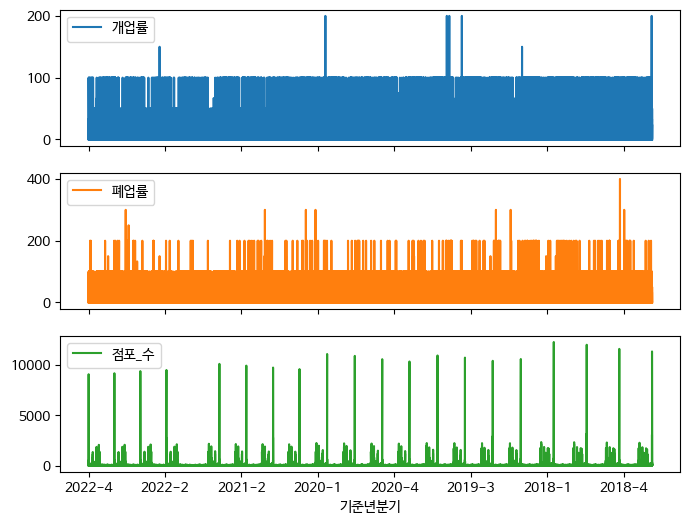

In [ ]:
features.plot(subplots=True)

In [ ]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
# 표준화
dataset = (dataset-data_mean)/data_std

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 3)


In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [ ]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

8/8 [==============================] - 1s 17ms/step
(256, 1)


In [ ]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 28s 131ms/step - loss: 0.2780 - val_loss: 0.3449
Epoch 2/10
200/200 [==============================] - 26s 132ms/step - loss: 0.2168 - val_loss: 0.3505
Epoch 3/10
200/200 [==============================] - 24s 119ms/step - loss: 0.1889 - val_loss: 0.3465
Epoch 4/10
200/200 [==============================] - 24s 120ms/step - loss: 0.2623 - val_loss: 0.3424
Epoch 5/10
200/200 [==============================] - 23s 115ms/step - loss: 0.2536 - val_loss: 0.3436
Epoch 6/10
200/200 [==============================] - 24s 121ms/step - loss: 0.2996 - val_loss: 0.3430
Epoch 7/10
200/200 [==============================] - 23s 114ms/step - loss: 0.2735 - val_loss: 0.3425
Epoch 8/10
200/200 [==============================] - 26s 129ms/step - loss: 0.1927 - val_loss: 0.3454
Epoch 9/10
200/200 [==============================] - 23s 116ms/step - loss: 0.1990 - val_loss: 0.3421
Epoch 10/10
200/200 [==============================] - 23s 116ms/step - l

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

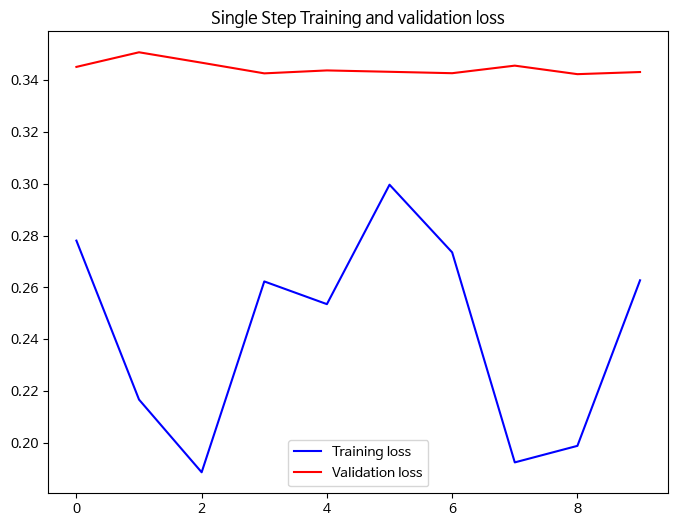

In [ ]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

8/8 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


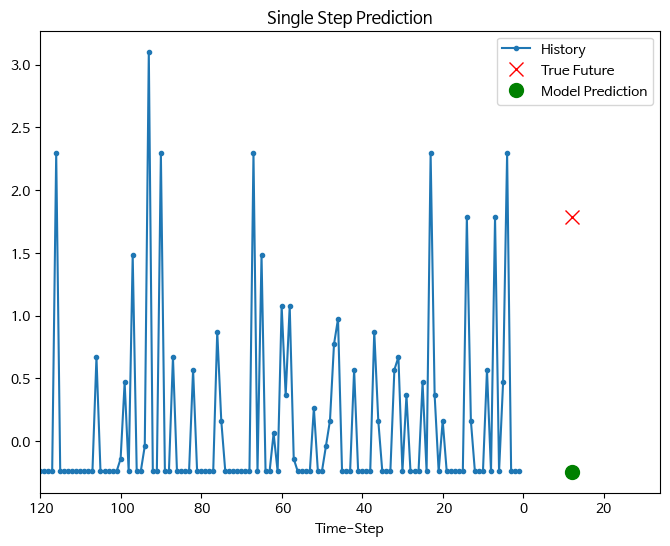

8/8 [==============================] - 0s 13ms/step


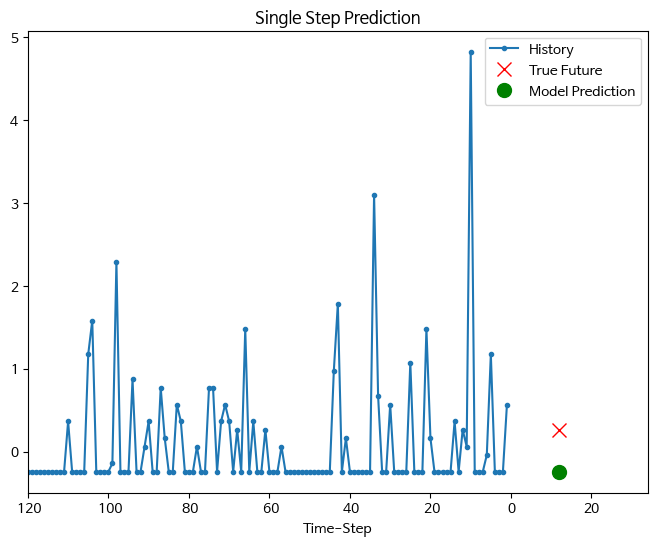

8/8 [==============================] - 0s 14ms/step


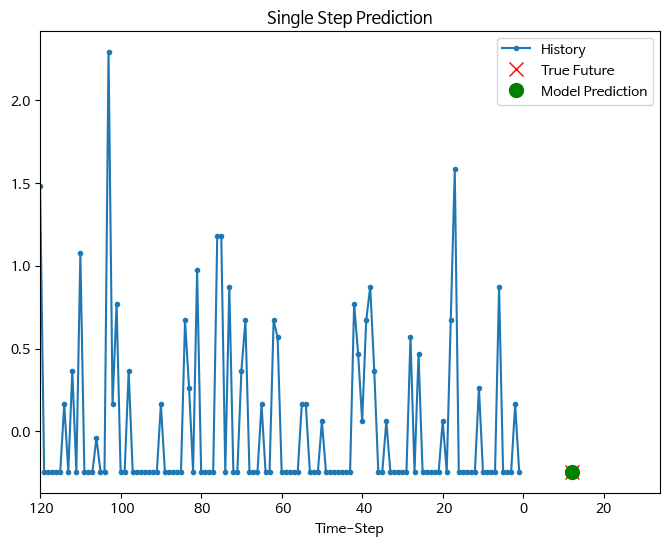

In [ ]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

In [ ]:
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [ ]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 3)

 Target temperature to predict : (72,)


In [ ]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()